In [1]:
import pandas as pd

from funciones_OD import *

ruta = "G:/PhD/Datos SIATA/Análisis/Descriptivo/"
archivo = "DF"
datos = pd.read_csv(ruta+"test_"+archivo+"_outliers_N.csv",sep=",")
#datos = pd.read_csv(ruta+"test_outliers.csv",sep=",")

variables = ['pm25']#,'humedad_relativa', 'temperatura'


In [2]:
pd.options.mode.chained_assignment = None  # default='warn' --- Para quitar los warnings
datos2 = datos.copy()
datos2=datos2.assign(Percentile="N") # Se agrega columna vacia
ident_outliers = pd.DataFrame()

fechas = datos2.fecha.unique().tolist()
nodos = datos2.codigoSerial.unique().tolist()
percentil = 80
margen = 10

#cont=1
for i in nodos:
    print("Nodo:",i, "Faltan:", (len(nodos)-nodos.index(i))-1)
    #print("Conteo:",cont)
    fild = datos2.loc[datos2.loc[:,"codigoSerial"] == i]
    
    for j in fechas:
       
        fil = fild.loc[fild.loc[:,"fecha"] == j]
        fil.reset_index(inplace=True, drop=True)
        
        if (len(fil)<=0):
            #print("No hay datos del nodo", i, "en la fecha", j)
            continue
        
        for sensor in variables:
            percen = np.percentile(fil[sensor],[percentil])
            #print(percen)
        
            for k in range(1,len(fil)):
                #cont += 1
                if (fil[sensor][k] > percen) and ((abs(fil[sensor][k] - fil[sensor][k-1])>margen) or (fil['Percentile'][k-1] == "S")):
                    #print("yo")
                    fil.loc[k,('Percentile')]= "S"
                              
                
                        
        ident_outliers = pd.concat([ident_outliers,fil],ignore_index=True)


Nodo: 2 Faltan: 0


In [28]:
matrix_conf (ident_outliers,'Percentile')
#ident_outliers[ident_outliers['Percentile'] == 'S']
#ident_outliers

TP: 3761 TN: 32518 FP: 2165 FN: 93
Datos totales: 38537
*************************************
Precisión: 0.6346608167397908
Exhaustividad: 0.9758692267773742
F1: 0.7691206543967282
F1: 0.769120654396728
Exactitud: 0.941406959545372



(32518, 93, 2165, 3761)

Precisión: 0.6346608167397908
Exhaustividad: 0.9758692267773742
F1: 0.7691206543967282
Exactitud: 0.941406959545372



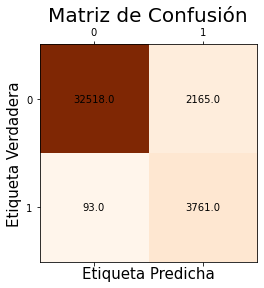

In [4]:
real = ident_outliers.pm25_outlier.tolist()
real = ['S' if value!='N' else value for value in real]
predicho = ident_outliers.Percentile.tolist()
confu_matrix (real,predicho)